In [1]:
import numpy as np
import sys
import os

sys.path.append("src")
from src.model import basic_solver, Results
from src.battery_storage import BatteryStorage
import matplotlib.pyplot as plt

In [8]:
capacity_mwh = 100
max_charge_rate_mw = 10
max_discharge_rate_mw = 10
charge_efficiency = 0.95
discharge_efficiency = 0.95
soc = 0
battery = BatteryStorage(
    capacity_mwh,
    max_charge_rate_mw,
    max_discharge_rate_mw,
    charge_efficiency,
    discharge_efficiency,
    soc,
)
# Create a production curve
np.random.seed(42)
T = 96 * 2
electricity_price_curve = 5 + 5 * np.sin(np.linspace(0, 4 * np.pi, T))
production_curve = np.random.randint(0, 11, T)

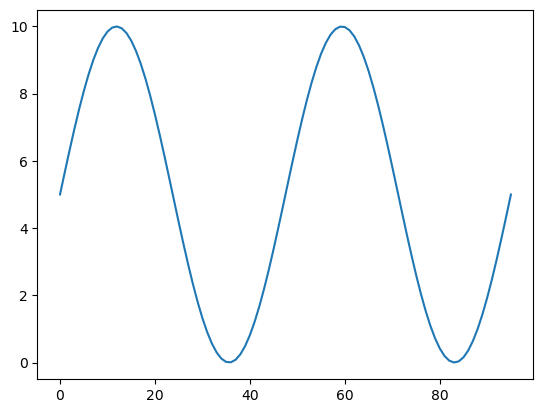

In [3]:
timesteps = np.arange(T)
plt.plot(timesteps, electricity_price_curve)

[ 6  3 10  7  4  6  9  2  6 10 10  7  4  3  7  7  2  5  4  1  7  5  1  4
  0  9  5  8  0 10 10  9  2  6  3  8  2  4  2  6  4  8  6  1  3  8  1  9
  8  9  4  1  3  6  7  2  0  3  1  7  3  1  5  5  9  3  5  1  9  1  9  3
  7  6  8  7  4  1  4  7  9  8  8  0  8  6  8  7  0  7  7 10  2  0  7  2]


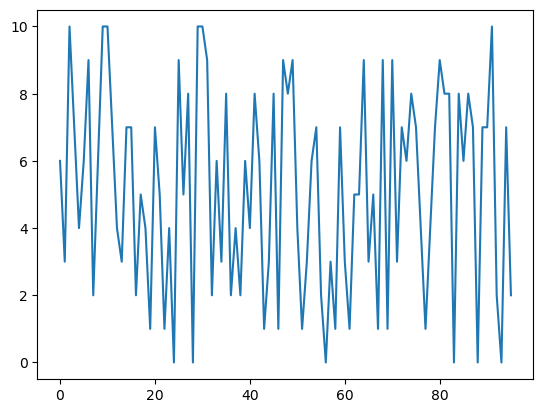

In [4]:
plt.plot(timesteps, production_curve)
print(production_curve)

In [7]:
dt = 1
low_price_threshold = 2
high_price_threshold = 8
stored_energy, sold_energy, battery_soc = basic_solver(
    battery=battery,
    production_curve=production_curve,
    electricity_price_curve=electricity_price_curve,
    dt=dt,
    low_price_threshold=low_price_threshold,
    high_price_threshold=high_price_threshold,
)

In [10]:
results = Results(
    battery=battery,
    stored_energy=stored_energy,
    sold_energy=sold_energy,
    battery_soc=battery_soc,
    electricity_price_curve=electricity_price_curve,
    production_curve=production_curve,
    dt=dt,
)

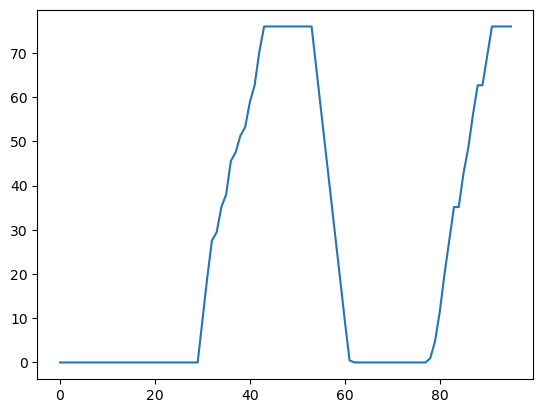

In [12]:
plt.plot(timesteps, results.battery_soc[:-1])

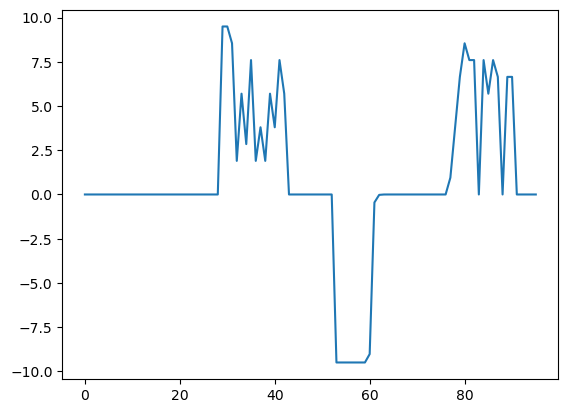

In [13]:
plt.plot(timesteps, results.stored_energy)

In [18]:
import matplotlib.pyplot as plt


def plot_results(timesteps, results):
    # First plot: Side-by-side plot of electricity prices and production volume
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot electricity prices
    axs[0].plot(
        timesteps,
        results.electricity_price_curve,
        label="Electricity Prices",
        color="b",
    )
    axs[0].set_title("Electricity Prices Over Time")
    axs[0].set_xlabel("Time (Timesteps)")
    axs[0].set_ylabel("Price")
    axs[0].legend()

    # Plot production volume
    axs[1].plot(
        timesteps, results.production_curve, label="Production Volume", color="g"
    )
    axs[1].set_title("Production Volume Over Time")
    axs[1].set_xlabel("Time (Timesteps)")
    axs[1].set_ylabel("Production")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    # Second plot: Production volume and battery charging curve with fill
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot production volume
    ax.plot(timesteps, results.production_curve, label="Production Volume", color="g")

    # Fill the battery charging curve area
    ax.fill_between(
        timesteps,
        results.charging_curve,
        0,
        label="Battery Charging Curve",
        color="b",
        alpha=0.3,
    )

    # Add labels, title, and legend
    ax.set_title("Production Volume and Battery Charging Curve Over Time")
    ax.set_xlabel("Time (Timesteps)")
    ax.set_ylabel("MWh / MW")
    ax.legend()

    plt.show()


# Example call for plotting the results:
# plot_results(timesteps, results)

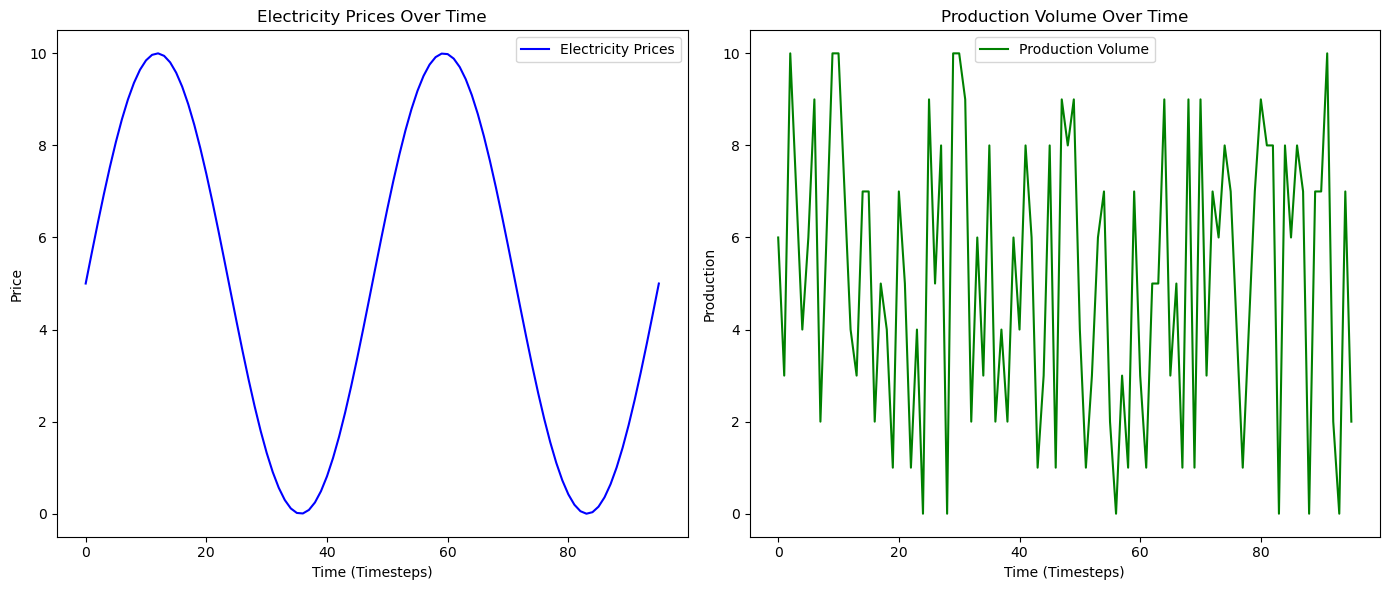

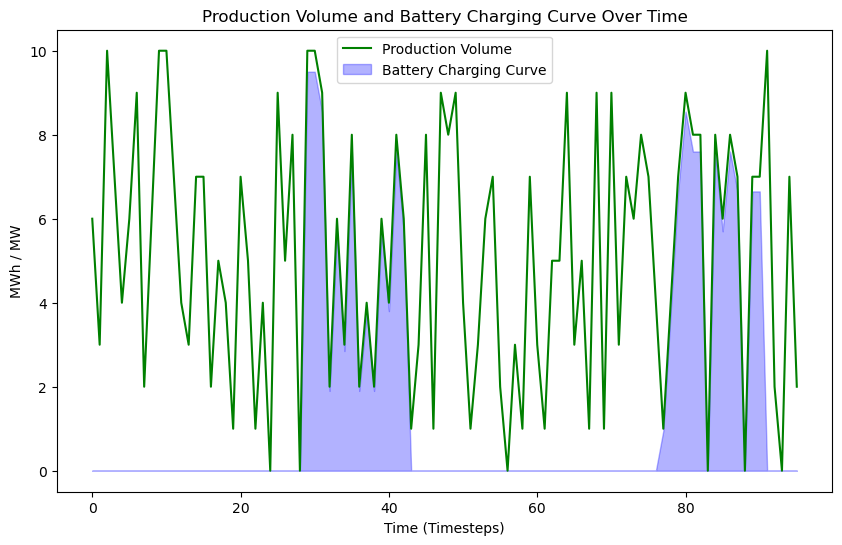

In [19]:
plot_results(timesteps, results)

In [20]:
def plot_cumulative_charge_discharge(timesteps, results):
    # Plot cumulative charging and discharging curves with fill down to the x-axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Fill cumulative charging curve
    ax.fill_between(
        timesteps,
        results.cumulative_charging_curve,
        0,
        label="Cumulative Charging Curve",
        color="b",
        alpha=0.3,
    )

    # Fill cumulative discharging curve
    ax.fill_between(
        timesteps,
        results.cumulative_discharging_curve,
        0,
        label="Cumulative Discharging Curve",
        color="r",
        alpha=0.3,
    )

    # Add labels, title, and legend
    ax.set_title("Cumulative Charging and Discharging Curves Over Time")
    ax.set_xlabel("Time (Timesteps)")
    ax.set_ylabel("MWh")
    ax.legend()

    plt.show()


# Example call for plotting the cumulative charging and discharging curves:
# plot_cumulative_charge_discharge(timesteps, results)

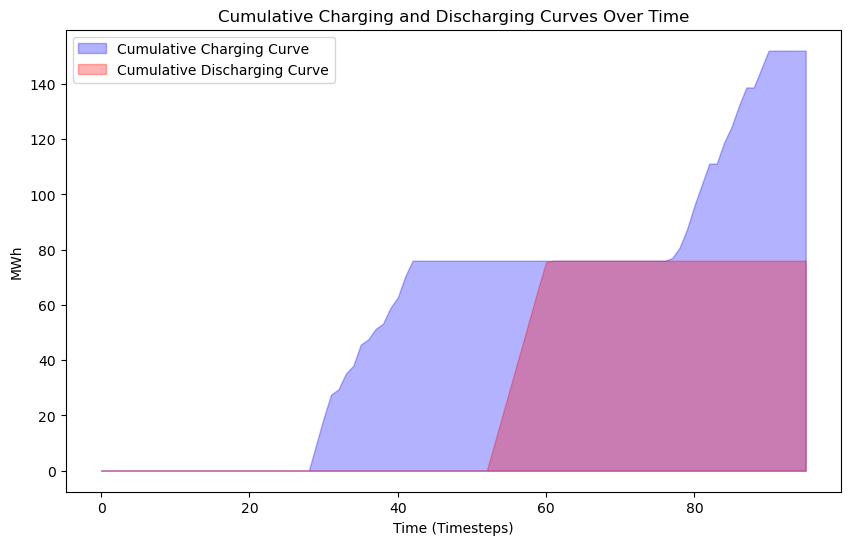

In [21]:
plot_cumulative_charge_discharge(timesteps, results)

In [27]:
def plot_battery_soc(timesteps, results):
    # Plot the battery state of charge (SOC) over time
    fig, ax = plt.subplots(figsize=(10, 6))

    extended_timesteps = np.append(timesteps, timesteps[-1] + 1)

    # Plot SOC curve
    ax.plot(
        extended_timesteps,
        results.battery_soc,
        label="Battery State of Charge (SOC)",
        color="purple",
        linewidth=2,
    )

    # Fill the SOC curve
    ax.fill_between(
        extended_timesteps, results.battery_soc, 0, color="purple", alpha=0.3
    )

    # Add labels, title, and legend
    ax.set_title("Battery State of Charge (SOC) Over Time")
    ax.set_xlabel("Time (Timesteps)")
    ax.set_ylabel("State of Charge (MWh)")
    ax.legend(loc="upper right")

    # Improve plot aesthetics
    ax.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()

    plt.show()


# Example call for plotting the battery state of charge:
# plot_battery_soc(timesteps, results)

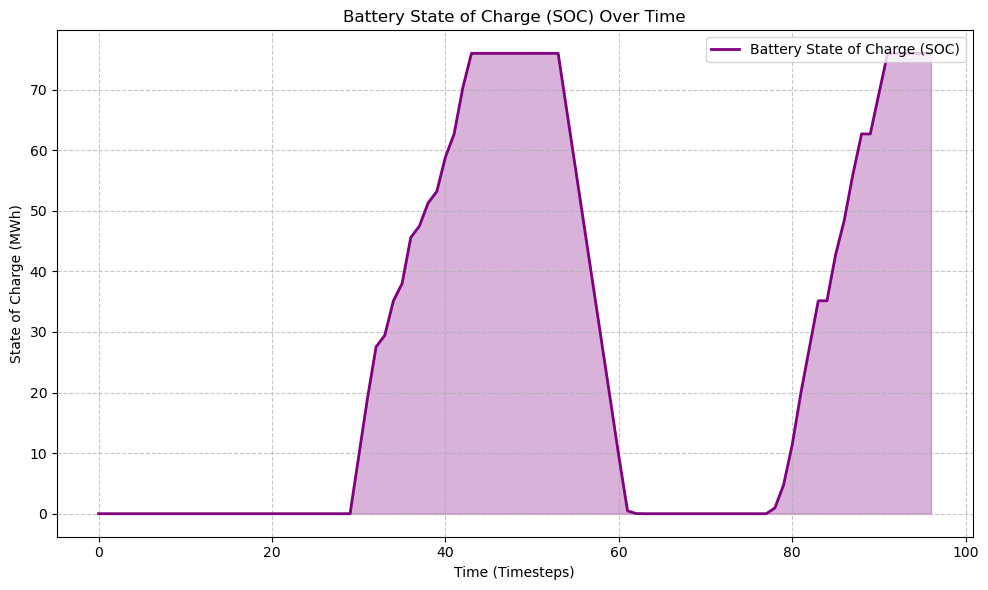

In [28]:
plot_battery_soc(timesteps, results)

In [29]:
def plot_cumulative_loss(timesteps, results):
    # Plot side-by-side cumulative loss due to charging and discharging
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot cumulative loss due to charging
    axs[0].fill_between(
        timesteps, results.cumulative_loss_charge_curve, 0, color="orange", alpha=0.6
    )
    axs[0].set_title("Cumulative Loss Due to Charging")
    axs[0].set_xlabel("Time (Timesteps)")
    axs[0].set_ylabel("Cumulative Loss (MWh)")
    axs[0].grid(True, linestyle="--", alpha=0.7)

    # Plot cumulative loss due to discharging
    axs[1].fill_between(
        timesteps, results.cumulative_loss_discharge_curve, 0, color="red", alpha=0.6
    )
    axs[1].set_title("Cumulative Loss Due to Discharging")
    axs[1].set_xlabel("Time (Timesteps)")
    axs[1].set_ylabel("Cumulative Loss (MWh)")
    axs[1].grid(True, linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()


# Example call for plotting the cumulative loss due to charging and discharging:
# plot_cumulative_loss(timesteps, results)

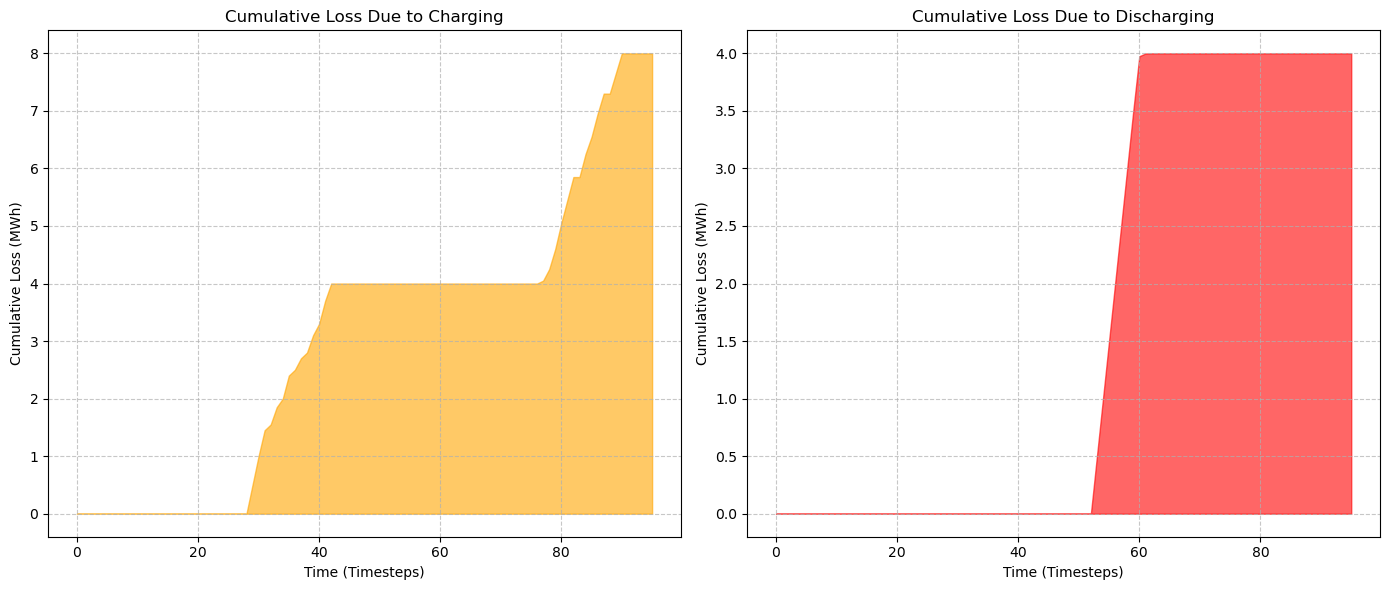

In [31]:
plot_cumulative_loss(timesteps, results)